### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# File to Load (Remember to Change These)
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()
# school_data_complete.dtypes


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


In [54]:
school_df = school_data_complete.loc[:, ["school_name", "type", "size", "budget", "math_score", "reading_score"]]
math_score_file = school_df.loc[school_df["math_score"] >=70]
math_score_count = math_score_file.count()["size"]
reading_score_file = school_df.loc[school_df["reading_score"] >=70]
reading_score_count = reading_score_file.count()["size"]
school_name_group = school_df.groupby(['school_name'])
filtered_school_name_group = school_name_group.mean()
overall_pass = school_df.loc[(school_df["math_score"] >= 70) & (
        school_df["reading_score"] >= 70), :]

total_school_count = len(school_df["school_name"].unique())
total_studentid_count = school_df["size"].count()
total_budget = filtered_school_name_group['budget'].sum()
average_math_score = school_df["math_score"].mean()
average_reading_score = school_df["reading_score"].mean()

percent_passing_math = (math_score_count/total_studentid_count)*100
percent_passing_reading = (reading_score_count/total_studentid_count)*100
percent_overall_pass = (overall_pass["math_score"].count()/total_studentid_count)*100

district_summary_df = pd.DataFrame({"Total Schools": [total_school_count], "Total Students": [total_studentid_count], "Total Budget": [total_budget], "Average Math Score": [average_math_score], "Average Reading Score": [average_reading_score], "% Passing Math": [percent_passing_math], "% Passing Reading": [percent_passing_reading], "% Over all Passing": [percent_overall_pass]})

district_summary_df["Total Budget"] = district_summary_df["Total Budget"].astype(float).map("${:,.2f}".format)
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].astype(float).map("{:,.2f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].astype(float).map("{:,.2f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Over all Passing"] = district_summary_df["% Over all Passing"].astype(float).map("{:,.2f} %".format)
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Over all Passing
0,15,39170,"$24,649,428.00",78.99,81.88,74.98 %,85.81 %,65.17 %


In [98]:
school_df = school_data_complete.loc[:, ["school_name", "type", "size", "budget", "math_score", "reading_score"]]

school_math_score = school_df.loc[school_df["math_score"] >=70]
school_math_filter = school_math_score.groupby(["school_name"])
school_percent_math = school_math_filter["math_score"].count()

school_reading_score = school_df.loc[school_df["reading_score"] >=70]
school_reading_filter = school_reading_score.groupby(["school_name"])
school_percent_reading = school_reading_filter["math_score"].count()

school_overall_pass = school_df.loc[(school_df["math_score"] >= 70) & (
        school_df["reading_score"] >= 70), :]
overall_school_pass_filter = school_overall_pass.groupby(['school_name'])
school_percent_overall = overall_school_pass_filter["math_score"].count()

summary_df = school_df.groupby(["school_name", "type"]).mean()
# summary_df = group_school_summary_df.mean() 
summary_df["Per Student Budget"] = summary_df["budget"] / summary_df["size"]
summary_df["% Passing Math"] = (school_percent_math / summary_df["size"])*100
summary_df["% Passing Reading"] = (school_percent_reading / summary_df["size"])*100
summary_df["% Overall Passing"] = (school_percent_overall / summary_df["size"])*100
school_summary_df = summary_df.rename(columns = {"school_name": "School Name", "type": "School Type", "size": "Total Students", "budget": "Total School Budget", "math_score": "Average Math Score", "reading_score":"Average Reading Score", "Per Student Budget": "Per Student Budget", "% Passing Math": "% Passing Math", "% Passing Reading": "% Passing Reading", "% Overall Passing": "% Overall Passing"})

school_summary_df["Total School Budget"] = school_summary_df["Total School Budget"].map("${:,.2f}".format)
school_summary_df["Per Student Budget"] = school_summary_df["Per Student Budget"].map("${:,.2f}".format)
school_summary_df["Average Math Score"] = school_summary_df["Average Math Score"].map("{:,.2f}".format)
school_summary_df["Average Reading Score"] = school_summary_df["Average Reading Score"].map("{:,.2f}".format)
school_summary_df["% Passing Math"] = school_summary_df["% Passing Math"].map("{:,.2f} %".format)
school_summary_df["% Passing Reading"] = school_summary_df["% Passing Reading"].map("{:,.2f} %".format)
school_summary_df["% Overall Passing"] = school_summary_df["% Overall Passing"].map("{:,.2f} %".format)
# school_summary_df = school_summary_df.reset_index()
school_summary_df


,,Total Students,Total School Budget,Average Math Score,Average Reading Score,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Bailey High School,District,4976.0,"$3,124,928.00",77.05,81.03,$628.00,66.68 %,81.93 %,54.64 %
Cabrera High School,Charter,1858.0,"$1,081,356.00",83.06,83.98,$582.00,94.13 %,97.04 %,91.33 %
Figueroa High School,District,2949.0,"$1,884,411.00",76.71,81.16,$639.00,65.99 %,80.74 %,53.20 %
Ford High School,District,2739.0,"$1,763,916.00",77.10,80.75,$644.00,68.31 %,79.30 %,54.29 %
Griffin High School,Charter,1468.0,"$917,500.00",83.35,83.82,$625.00,93.39 %,97.14 %,90.60 %
Hernandez High School,District,4635.0,"$3,022,020.00",77.29,80.93,$652.00,66.75 %,80.86 %,53.53 %
Holden High School,Charter,427.0,"$248,087.00",83.80,83.81,$581.00,92.51 %,96.25 %,89.23 %
Huang High School,District,2917.0,"$1,910,635.00",76.63,81.18,$655.00,65.68 %,81.32 %,53.51 %
Johnson High School,District,4761.0,"$3,094,650.00",77.07,80.97,$650.00,66.06 %,81.22 %,53.54 %


In [56]:
top_performing_schools = school_summary_df.sort_values("% Overall Passing", ascending=False)
top_performing_schools.head()

,,Total Students,Total School Budget,Average Math Score,Average Reading Score,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Cabrera High School,Charter,1858.0,"$1,081,356.00",83.06,83.98,$582.00,94.13 %,97.04 %,91.33 %
Thomas High School,Charter,1635.0,"$1,043,130.00",83.42,83.85,$638.00,93.27 %,97.31 %,90.95 %
Griffin High School,Charter,1468.0,"$917,500.00",83.35,83.82,$625.00,93.39 %,97.14 %,90.60 %
Wilson High School,Charter,2283.0,"$1,319,574.00",83.27,83.99,$578.00,93.87 %,96.54 %,90.58 %
Pena High School,Charter,962.0,"$585,858.00",83.84,84.04,$609.00,94.59 %,95.95 %,90.54 %


In [57]:
bottom_performing_schools = school_summary_df.sort_values("% Overall Passing")
bottom_performing_schools.head()

,,Total Students,Total School Budget,Average Math Score,Average Reading Score,Per Student Budget,% Passing Math,% Passing Reading,% Overall Passing
school_name,type,,,,,,,,
Rodriguez High School,District,3999.0,"$2,547,363.00",76.84,80.74,$637.00,66.37 %,80.22 %,52.99 %
Figueroa High School,District,2949.0,"$1,884,411.00",76.71,81.16,$639.00,65.99 %,80.74 %,53.20 %
Huang High School,District,2917.0,"$1,910,635.00",76.63,81.18,$655.00,65.68 %,81.32 %,53.51 %
Hernandez High School,District,4635.0,"$3,022,020.00",77.29,80.93,$652.00,66.75 %,80.86 %,53.53 %
Johnson High School,District,4761.0,"$3,094,650.00",77.07,80.97,$650.00,66.06 %,81.22 %,53.54 %


In [58]:
columns = ["school_name", "grade", "math_score"]
ninth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "9th", columns]
ninth_grade_filter = ninth_grade_math_score.groupby(["school_name"])
ninth_grade_series = ninth_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
tenth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "10th", columns]
tenth_grade_filter = tenth_grade_math_score.groupby(["school_name"])
tenth_grade_series = tenth_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
eleventh_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "11th", columns]
eleventh_grade_filter = eleventh_grade_math_score.groupby(["school_name"])
eleventh_grade_series = eleventh_grade_filter.mean()

columns = ["school_name", "grade", "math_score"]
twelfth_grade_math_score = school_data_complete.loc[school_data_complete["grade"] == "12th", columns]
twelfth_grade_filter = twelfth_grade_math_score.groupby(["school_name"])
twelfth_grade_series = twelfth_grade_filter.mean()

first_df = pd.merge(ninth_grade_series, tenth_grade_series, how = "left", on = ["school_name"])
second_df = pd.merge(eleventh_grade_series, twelfth_grade_series, how = "left", on = ["school_name"])
combined_df = pd.merge(first_df, second_df, how = "left", on = ["school_name"])
combined_df = combined_df.rename(columns = {"math_score_x_x": "9th", "math_score_y_x": "10th", "math_score_x_y": "11th", "math_score_y_y": "12th"})

combined_df["9th"] = combined_df["9th"].astype(float).map("{:,.2f}".format)
combined_df["10th"] = combined_df["10th"].astype(float).map("{:,.2f}".format)
combined_df["11th"] = combined_df["11th"].astype(float).map("{:,.2f}".format)
combined_df["12th"] = combined_df["12th"].astype(float).map("{:,.2f}".format)
combined_df

,9th,10th,11th,12th
school_name,,,,
Bailey High School,77.08,77.00,77.52,76.49
Cabrera High School,83.09,83.15,82.77,83.28
Figueroa High School,76.40,76.54,76.88,77.15
Ford High School,77.36,77.67,76.92,76.18
Griffin High School,82.04,84.23,83.84,83.36
Hernandez High School,77.44,77.34,77.14,77.19
Holden High School,83.79,83.43,85.00,82.86
Huang High School,77.03,75.91,76.45,77.23
Johnson High School,77.19,76.69,77.49,76.86


In [97]:
columns = ["school_name", "grade", "reading_score"]
ninth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "9th", columns]
ninth_grade_filter = ninth_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
tenth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "10th", columns]
tenth_grade_filter = tenth_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
eleventh_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "11th", columns]
eleventh_grade_filter = eleventh_grade_reading_score.groupby(["school_name"]).mean()

columns = ["school_name", "grade", "reading_score"]
twelfth_grade_reading_score = school_data_complete.loc[school_data_complete["grade"] == "12th", columns]
twelfth_grade_filter = twelfth_grade_reading_score.groupby(["school_name"]).mean()

first_df = pd.merge(ninth_grade_filter, tenth_grade_filter, how = "left", on = ["school_name"])
second_df = pd.merge(eleventh_grade_filter, twelfth_grade_filter, how = "left", on = ["school_name"])
combined_df = pd.merge(first_df, second_df, how = "left", on = ["school_name"])
combined_df = combined_df.rename(columns = {"reading_score_x_x": "9th", "reading_score_y_x": "10th", "reading_score_x_y": "11th", "reading_score_y_y": "12th"})

combined_df["9th"] = combined_df["9th"].astype(float).map("{:,.2f}".format)
combined_df["10th"] = combined_df["10th"].astype(float).map("{:,.2f}".format)
combined_df["11th"] = combined_df["11th"].astype(float).map("{:,.2f}".format)
combined_df["12th"] = combined_df["12th"].astype(float).map("{:,.2f}".format)
combined_df

,9th,10th,11th,12th
school_name,,,,
Bailey High School,81.30,80.91,80.95,80.91
Cabrera High School,83.68,84.25,83.79,84.29
Figueroa High School,81.20,81.41,80.64,81.38
Ford High School,80.63,81.26,80.40,80.66
Griffin High School,83.37,83.71,84.29,84.01
Hernandez High School,80.87,80.66,81.40,80.86
Holden High School,83.68,83.32,83.82,84.70
Huang High School,81.29,81.51,81.42,80.31
Johnson High School,81.26,80.77,80.62,81.23


In [94]:
student_budget_df = summary_df
bins = [0, 584, 629, 644, 675]
group_labels = ["<584", "585-629", "630-644", "645-675"]

spending_group_df = student_budget_df[['math_score', 'reading_score','Per Student Budget', '% Passing Math', '% Passing Reading', '% Overall Passing']]
spending_group_df = spending_group_df.rename(columns = {'math_score': 'Average Math Score', 'reading_score': 'Average Reading Score'})
spending_group_df["Spending Ranges (Per Student)"] = pd.cut(spending_group_df["Per Student Budget"], bins, labels=group_labels)
per_student_df = spending_group_df.groupby("Spending Ranges (Per Student)").mean()
per_student_df = per_student_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# per_student_df["Average Math Score"] = per_student_df["Average Math Score"].map("{:,.2f}".format)
#per_student_df["Average Reading Score"] = per_student_df["Average Reading Score"].map("{:,.2f}".format)
# per_student_df["% Passing Math"] = per_student_df["% Passing Math"].map("{:,.2f} %".format)
# per_student_df["% Passing Reading"] = per_student_df["% Passing Reading"].map("{:,.2f} %".format)
# per_student_df["% Overall Passing"] = per_student_df["% Overall Passing"].map("{:,.2f} %".format)
per_student_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
Spending Ranges (Per Student),,,,,
<584,83.455399,83.933814,93.460096,96.610877,90.369459
585-629,81.899826,83.155286,87.133538,92.718205,81.418596
630-644,78.518855,81.624473,73.484209,84.391793,62.857656
645-675,76.997210,81.027843,66.164813,81.133951,53.526855


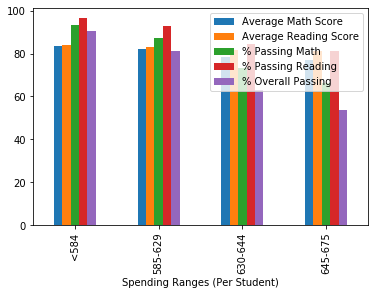

In [95]:
per_student_df.plot.bar()


In [85]:
school_data_df = summary_df
bins = [0, 1000, 2000, 5000]
group_labels = ["<1000", "1000-2000", "2000-5000"]

school_group_df = school_data_df[['size', 'math_score', 'reading_score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
school_group_df = school_group_df.rename(columns = {'size': 'Total Students', 'math_score': 'Average Math Score', 'reading_score': 'Average Reading Score'})
school_group_df["School Size"] = pd.cut(school_group_df["Total Students"], bins, labels=group_labels)
school_size_df = school_group_df.groupby("School Size").mean()
school_size_df = school_size_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# school_size_df["Average Math Score"] = school_size_df["Average Math Score"].map("{:,.2f}".format)
# school_size_df["Average Reading Score"] = school_size_df["Average Reading Score"].map("{:,.2f}".format)
# school_size_df["% Passing Math"] = school_size_df["% Passing Math"].map("{:,.2f} %".format)
# school_size_df["% Passing Reading"] = school_size_df["% Passing Reading"].map("{:,.2f} %".format)
# school_size_df["% Overall Passing"] = school_size_df["% Overall Passing"].map("{:,.2f} %".format)
school_size_df

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Size,,,,,
<1000,83.821598,83.929843,93.550225,96.099437,89.883853
1000-2000,83.374684,83.864438,93.599695,96.790680,90.621535
2000-5000,77.746417,81.344493,69.963361,82.766634,58.286003


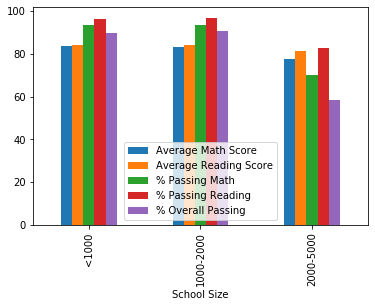

In [86]:
school_size_df.plot(kind='bar')

In [80]:
school_score_df = summary_df
bins = [0, 2000, 5000]
group_labels = ["Charter", "District"]

school_type_df = school_score_df[['size', 'math_score', 'reading_score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
school_type_df = school_type_df.rename(columns = {'size': 'Total Students', 'math_score': 'Average Math Score', 'reading_score': 'Average Reading Score'})
school_type_df["School Type"] = pd.cut(school_type_df["Total Students"], bins, labels=group_labels)
school_group_df = school_type_df.groupby("School Type").mean()
school_group_df = school_group_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# school_group_df["Average Math Score"] = school_group_df["Average Math Score"].map("{:,.2f}".format)
# school_group_df["Average Reading Score"] = school_group_df["Average Reading Score"].map("{:,.2f}".format)
# school_group_df["% Passing Math"] = school_group_df["% Passing Math"].map("{:,.2f} %".format)
# school_group_df["% Passing Reading"] = school_group_df["% Passing Reading"].map("{:,.2f} %".format)
# school_group_df["% Overall Passing"] = school_group_df["% Overall Passing"].map("{:,.2f} %".format)
school_group_df


,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
School Type,,,,,
Charter,83.502373,83.883125,93.585560,96.593182,90.410769
District,77.746417,81.344493,69.963361,82.766634,58.286003


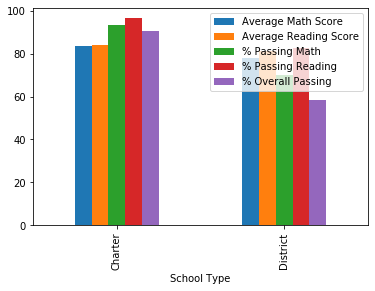

In [81]:
school_group_df.plot(kind='bar')

Looking at the the plots above, it is very clear that spending more money per-student did not improve grades at all. The number of students is what matter 'schools with more than 2000 students have the lowest grades'. Small class size means better grades and that is why Charter schools grades average way better than District or public schools.